# Определение перспективного тарифа для телеком компании

Наша компания, как и любая адекватная коммерческая организация, стремится приносить пользу людям и увеличивать свою прибыль. Перед нами была поставлена задача: определить, какой из существующих тарифов приносит больше прибыли. После этого нужно дать рекомендации коллегам из маркетинга, чтобы они скорректировали маркетинговый бюджет (кризис, Covid).
В нашем распоряжении есть несколько файлов с информацией о тарифах и клиентах (статистика по их звонкам, смс, использованному трафику), которые мы и исследуем.

Будем следовать следующему плану:
- [изучим общую информацию](#general)
- [исправим необходимые данные (заполним пропуски и приведем данные к нужным типам)](#corr)
- [объединим файлы для удобства дальнейшего анализа и добавим необходимую информацию](#merge)
- [проведем анализ среднестатистического пользователя обоих тарифов](#analysis)
- [проверим статистические гипотезы](#stat)
- [сделаем вывод](#output)

## Изучение общей информации и корректировка данных
<a id='genaral'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('C:\\Users\\Александр\Datasets/calls.csv')
df_internet = pd.read_csv('C:\\Users\\Александр\Datasets/internet.csv')
df_messages = pd.read_csv('C:\\Users\\Александр\Datasets/messages.csv')
df_tariffs = pd.read_csv('C:\\Users\\Александр\Datasets/tariffs.csv')
df_users = pd.read_csv('C:\\Users\\Александр\Datasets/users.csv')

<a id='corr'></a>
Сначала обработаем все пропуски в таблицах, приведем к нужным типам, а затем - для дальнейшего анализа - сведем их все в одну


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls['id'] = df_calls['id'].astype(int)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')


Для дальнейших операций нам понадобится группировать данные по месяцам - заранее создадим столбец с (пригодится и для других)

In [5]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 7.0 MB


Посмотрим на распределение длительности звонков

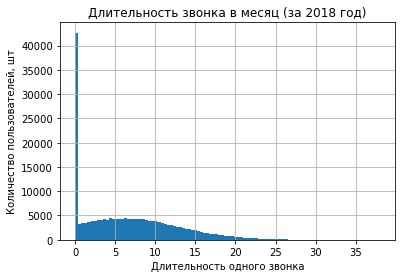

In [6]:
df_calls['duration'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество пользователей, шт')
plt.xlabel('Длительность одного звонка')
plt.title('Длительность звонка в месяц (за 2018 год)')
plt.show()

Видим, что большУю долю занимают звонки длительностью 0 минут - есть подозрение, что это пропущенные. За них люди денег не платят, поэтому оставим их как есть. Если их удалить - они повлияют на другие показатели + исчезнет сам факт действия целевого.

Аналогичную работу (обработка пропусков, приведение типов, добавление месяца) проведем по остальным датасетам

In [7]:
df_internet.info()
df_internet.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [8]:
df_internet['id'] = df_internet['id'].astype(int)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_internet['month'] = df_internet['session_date'].dt.month
#display(df_internet.info())

In [9]:
display(df_messages.info())
display(df_messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_messages['id'] = df_messages['id'].astype(int)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_messages['month'] = df_messages['message_date'].dt.month
#display(df_messages.info())

In [11]:
display(df_tariffs.info())
#display(df_tariffs.head())
#тут все норм с типами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [12]:
display(df_users.info())
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y.%m.%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d')

## Объединение фреймов и добавление данных
<a id='merge'></a>

В целях дальнейшего анализа будет удобнее работать с одной таблицей, в которой находятся все данные. Думается, что можно сначала объединить звонки, сообщения и интернет (предварительно сгруппированные), а потом к общему пристегнуть пользователей и тарифы. 

Но сначала, поскольку оплата за интернет считается у нас руб за Гб, то для двух столбцов переведем мб в Гб с округлением вверх (оператор-то жадный). Также округлим минуты до целого верхнего.

In [14]:
df_internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)
df_internet['gb_used'] = (df_internet['gb_used'] / 1024).apply(np.ceil)
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
df_tariffs['gb_per_month_included'] = (df_tariffs['gb_per_month_included'] / 1024).apply(np.ceil)
df_internet.head()

,Unnamed: 0,id,gb_used,session_date,user_id,month
0,0,10000,1.0,2018-11-25,1000,11
1,1,10001,2.0,2018-09-07,1000,9
2,2,10002,2.0,2018-06-25,1000,6
3,3,10003,1.0,2018-08-22,1000,8
4,4,10004,1.0,2018-09-24,1000,9


In [15]:
#Теперь можно и сгруппировать)
df_calls_grouped = df_calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()
df_internet_grouped = df_internet.groupby(['user_id', 'month']).agg({'gb_used':'sum'}).reset_index()
df_messages_grouped = df_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()


Теперь, когда у нас есть сгруппированные данные по всем фреймам, можем соединять их

In [16]:
df = df_calls_grouped.merge(df_internet_grouped, on=['user_id', 'month'], how='outer').merge(df_messages_grouped, on=['user_id', 'month'], how='outer').fillna(0)
df = df.merge(df_users, on='user_id', how='left').merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left')
df.tail()

,user_id,month,duration,gb_used,id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
3209,1489,8,0.0,28.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,smart
3210,1489,9,0.0,50.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,smart
3211,1489,10,0.0,52.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,smart
3212,1489,11,0.0,46.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,smart
3213,1489,12,0.0,45.0,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,smart


<a id='cc'></a>
Теперь нам надо рассчитать выручку (profit) по каждому пользователю в разрезе каждого месяца: нужно сложить абонентскую плату и перераход по каждому показателю (звонки, интернет, смс). Соответственно, сначала займемся перерасходами (если они окажутся меньше нуля - значит, чел не вышел за рамки лимита, и компания не заработала на нем больше абонентской платы - заменим их на ноль - перерасхода не было) 


In [17]:
df['over_id'] = df['id'] - df['messages_included']
df['over_gb'] = df['gb_used'] - df['gb_per_month_included']
df['over_duration'] = df['duration'] - df['minutes_included']
df.loc[df['over_id'] < 0, 'over_id'] = 0
df.loc[df['over_gb'] < 0, 'over_gb'] = 0
df.loc[df['over_duration'] < 0, 'over_duration'] = 0
df.tail()


,user_id,month,duration,gb_used,id,age,churn_date,city,first_name,last_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_id,over_gb,over_duration
3209,1489,8,0.0,28.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,smart,0.0,13.0,0.0
3210,1489,9,0.0,50.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,smart,0.0,35.0,0.0
3211,1489,10,0.0,52.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,smart,0.0,37.0,0.0
3212,1489,11,0.0,46.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,smart,0.0,31.0,0.0
3213,1489,12,0.0,45.0,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,smart,0.0,30.0,0.0


In [18]:
df['profit'] = df['over_id'] * df['rub_per_message'] + df['over_gb'] * df['rub_per_gb'] + df['over_duration'] * df['over_duration'] + df['rub_monthly_fee']
df.tail()


,user_id,month,duration,gb_used,id,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_id,over_gb,over_duration,profit
3209,1489,8,0.0,28.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,13.0,0.0,3150.0
3210,1489,9,0.0,50.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,35.0,0.0,7550.0
3211,1489,10,0.0,52.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,37.0,0.0,7950.0
3212,1489,11,0.0,46.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,31.0,0.0,6750.0
3213,1489,12,0.0,45.0,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,30.0,0.0,6550.0


Предобработка сделана, можно приступить к анализу

## Анализ и описание данных
<a id='analysis'></a>

Для дальнейшего анализа различий между тарифами разобъем df на две части - df_smart и df_ultra

In [19]:
df_smart = df[df['tariff'] == 'smart']
df_ultra = df[df['tariff'] == 'ultra']

### Тариф Смарт
Построим гистограммы параметров, которые нам интересны

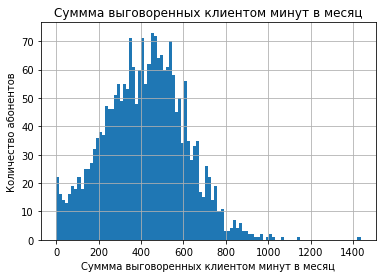

In [20]:
df_smart['duration'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Суммма выговоренных клиентом минут в месяц')
plt.title('Суммма выговоренных клиентом минут в месяц')
plt.show()

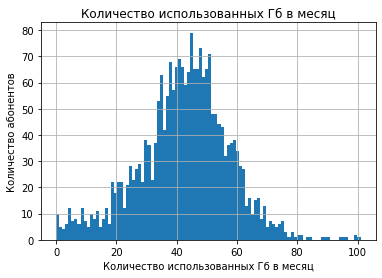

In [21]:
df_smart['gb_used'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Количество использованных Гб в месяц')
plt.title('Количество использованных Гб в месяц')
plt.show()

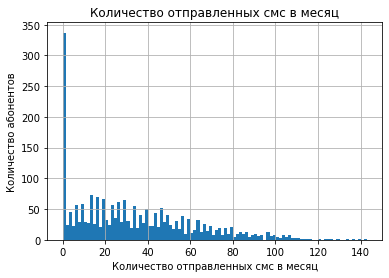

In [22]:
df_smart['id'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Количество отправленных смс в месяц')
plt.title('Количество отправленных смс в месяц')
plt.show()


In [23]:
df_smart.describe()

,user_id,month,duration,gb_used,id,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_id,over_gb,over_duration,profit
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,42.418125,33.384029,46.556303,50.0,15.0,500.0,550.0,200.0,3.0,3.0,5.799910,27.774338,41.605653,15020.541498
std,146.119496,2.920316,190.313730,14.943104,28.227876,16.353371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.442456,14.150440,84.678573,33383.432956
min,1001.000000,1.000000,0.000000,0.000000,0.000000,18.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,34.000000,10.000000,32.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.000000,19.000000,0.000000,4950.000000
50%,1239.000000,9.000000,422.000000,43.000000,28.000000,47.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.000000,28.000000,0.000000,7150.000000
75%,1376.000000,11.000000,545.000000,52.000000,51.000000,62.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,1.000000,37.000000,45.000000,10789.000000
max,1499.000000,12.000000,1435.000000,101.000000,143.000000,75.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,93.000000,86.000000,935.000000,883817.000000


<a id='rr'></a>
В итоге можем сказать, что среднестатистичесий пользователь (нормальное распределение + приблизительное равенство медианы и среднего) тарифа Смарт в среднем выговаривает в месяц 420 минут, расходует 42 Гб трафика и отправляет 30 смс. В обоих (как будет показано далее) тарифах мы видим много нулевых выбросов в количестве смс: думаем, это связано с тем, что использование смс уже не актуально, и люди предпочитают мессенджеры. Вместе с тем, отсекать таких людей нельзя: человек может не отправлять смс, но активно использовать другие возможности тарифа.

In [24]:
variance_smart = np.var(df_smart, ddof=1)
variance_smart

user_id                  2.135091e+04
month                    8.528245e+00
duration                 3.621932e+04
gb_used                  2.232964e+02
id                       7.968130e+02
age                      2.674328e+02
messages_included        0.000000e+00
gb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
rub_monthly_fee          0.000000e+00
rub_per_gb               0.000000e+00
rub_per_message          0.000000e+00
rub_per_minute           0.000000e+00
over_id                  1.806996e+02
over_gb                  2.002350e+02
over_duration            7.170461e+03
profit                   1.114454e+09
dtype: float64

### Тариф Ультра

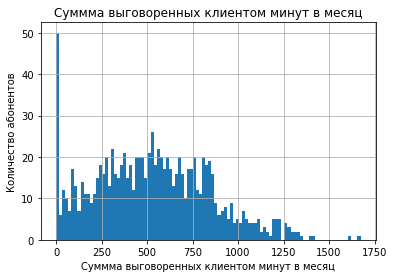

In [25]:
df_ultra['duration'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Суммма выговоренных клиентом минут в месяц')
plt.title('Суммма выговоренных клиентом минут в месяц')
plt.show()

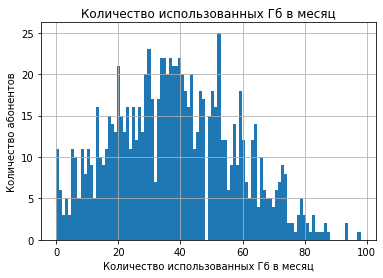

In [26]:
df_ultra['gb_used'].plot(kind='hist', bins=100, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Количество использованных Гб в месяц')
plt.title('Количество использованных Гб в месяц')
plt.show()

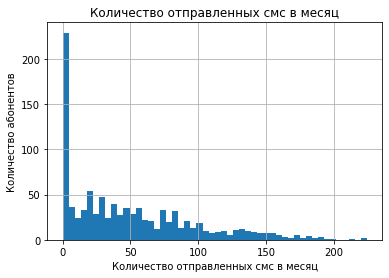

In [27]:
df_ultra['id'].plot(kind='hist', bins=50, grid=True)
plt.ylabel('Количество абонентов')
plt.xlabel('Количество отправленных смс в месяц')
plt.title('Количество отправленных смс в месяц')
plt.show()

In [28]:
df_ultra.describe()

,user_id,month,duration,gb_used,id,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_id,over_gb,over_duration,profit
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000,985.0,985.000000
mean,1263.094416,8.250761,526.623350,38.164467,49.363452,46.834518,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,12.629442,0.0,3844.416244
std,140.694908,2.871762,317.606098,19.564656,47.804457,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.440928,0.0,2166.139153
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
25%,1143.000000,6.000000,284.000000,23.000000,6.000000,30.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,38.000000,45.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,8.000000,0.0,3150.000000
75%,1381.000000,11.000000,752.000000,52.000000,79.000000,63.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,22.000000,0.0,5250.000000
max,1495.000000,12.000000,1673.000000,98.000000,224.000000,75.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,68.000000,0.0,12150.000000


Средний пользователь тарифа Ультра выговаривает в месяц 520 минут, тратит 38 Гб трафика, отправляет 49 смс. 

In [29]:
variance_ultra = np.var(df_ultra, ddof=1)
variance_ultra

user_id                  1.979506e+04
month                    8.247014e+00
duration                 1.008736e+05
gb_used                  3.827758e+02
id                       2.285266e+03
age                      2.926830e+02
messages_included        0.000000e+00
gb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
rub_monthly_fee          0.000000e+00
rub_per_gb               0.000000e+00
rub_per_message          0.000000e+00
rub_per_minute           0.000000e+00
over_id                  0.000000e+00
over_gb                  2.085404e+02
over_duration            0.000000e+00
profit                   4.692159e+06
dtype: float64

## Проверка гипотез
<a id='stat'></a>

Поскольку мы будем сравнивать выручку по двум тарифам, нам стоит сразу сгруппировать эти выборки. 
Сгруппируем данные, выдвинем гипотезу и проверим ее


    H0: Показатели средней выручки пользователей тарифов «Ультра» и «Смарт» равны друг другу
    H1: Показатели средней выручки пользователей тарифов не равны друг другу

In [30]:
smart = df.query('tariff == "smart"')['profit']
ultra = df.query('tariff == "ultra"')['profit']

alpha = 0.05 #если p-value окажется меньше него - отвергнем гипотезу
 
# Т.к. дисперсии выборок не равны (что мы увидели в расчетах выше), то используем параметр equal_var = False
results = st.ttest_ind(smart, ultra, equal_var = False)
 
display('p-значение:', results.pvalue / 2)
 
if (results.pvalue / 2 < alpha) and (smart.mean() != ultra.mean()):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

2.6340244766324675e-53

'Отвергаем нулевую гипотезу'

В итоге делаем вывод: НЕ можем говорить о том, что выручка по обоим тарифам одинакова.

Теперь исследуем, есть ли ощутимая разница в выручке между московскими и региональными пользователями

    H0: Показатели средней выручки от московских и региональных пользователей  равны друг другу
    H1: Показатели средней выручки от московских и региональных пользователей  НЕ равны друг другу

In [31]:
df_msc = df.query('city == "Москва"')['profit']
df_not_msc = df.query('city != "Москва"')['profit'] 

alpha = 0.05 #если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_msc, df_not_msc, equal_var=False)

display('p-значение:', results.pvalue / 2)
 
if (results.pvalue / 2 < alpha) and (smart.mean() != ultra.mean()):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.02642198732972475

'Отвергаем нулевую гипотезу'

В итоге делаем вывод: НЕ можем говорить о том, что разница в выручке между московскими и региональными пользователями одинакова.

## Общий вывод
<a id='output'></a>

   Итак, мы изучили всю информацию, которая у нас имется. Поскольку нашей главной целью является определение лучшего тарифа, то обратимся к цифрам. Среднестатистичесий пользователь тарифа Смарт в среднем выговаривает в месяц 420 минут, расходует 42 Гб трафика и отправляет 30 смс. Пользователь тарифа Ультра выговаривает в месяц 520 минут, тратит 38 Гб трафика, отправляет 49 смс. Несмотря на не столь сильно различающиеся показатели, медианная выручка по тарифу Смарт вдвое чем превышает аналогичную выручку по тарифу Ультра (7150 руб в месяц проти 3150). И основную роль здесь играет перерасход трафика: в Смарте он составляет 22 гб в месяц, в Ультра - всего 8. Плюс 1 перерасходованный Гб в Смарте стоит дороже.
    Исходя из всего вышеперечисленного, можем рекомендовать нашим коллегам нарастить долю пользователей тарифа Смарт для увеличения общей выручки компании.
